<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">November 2023</p>
<p style="margin: 0; text-align:right;">Complex data in health</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In [1]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

# 1. Studying the PPI

In [2]:
ppi = pd.read_csv('data/ppi.csv')

In [3]:
ppi

,GeneA_ID,GeneB_ID,Symbol_A,Symbol_B
0,9796.0,56992.0,PHYHIP,KIF15
1,7918.0,9240.0,GPANK1,PNMA1
2,8233.0,23548.0,ZRSR2,TTC33
3,4899.0,11253.0,NRF1,MAN1B1
4,5297.0,8601.0,PI4KA,RGS20
...,...,...,...,...
332744,NaN,343068.0,NaN,PRAMEF5
332745,NaN,390078.0,NaN,OR52E6
332746,NaN,440435.0,NaN,GPR179
332747,NaN,548594.0,NaN,KIR3DP1


In [4]:
ppi = (ppi[['Symbol_A','Symbol_B']]
       .drop_duplicates()
       .dropna())

In [5]:
ppi

,Symbol_A,Symbol_B
0,PHYHIP,KIF15
1,GPANK1,PNMA1
2,ZRSR2,TTC33
3,NRF1,MAN1B1
4,PI4KA,RGS20
...,...,...
328138,LRRC3B,YIPF6
328139,CHD1,CUL4A
328140,DDX5,U2AF1
328141,SMAD4,HEMGN


In [6]:
gppi = nx.from_pandas_edgelist(ppi, 'Symbol_A', 'Symbol_B')

In [7]:
degrees = [[n, gppi.degree(n)] for n in gppi.nodes()]

degrees_df = pd.DataFrame(degrees, columns=['nodes', 'degree'])

In [8]:
degrees_df

,nodes,degree
0,PHYHIP,33
1,KIF15,32
2,GPANK1,106
3,PNMA1,180
4,ZRSR2,52
...,...,...
18502,OPTC,1
18503,ACSM2B,1
18504,OPN5,1
18505,SLC45A1,1


In [9]:
dd = (degrees_df.groupby('degree')
      .agg('count')
      .reset_index()
      .rename(columns={'nodes':'number_nodes'}))

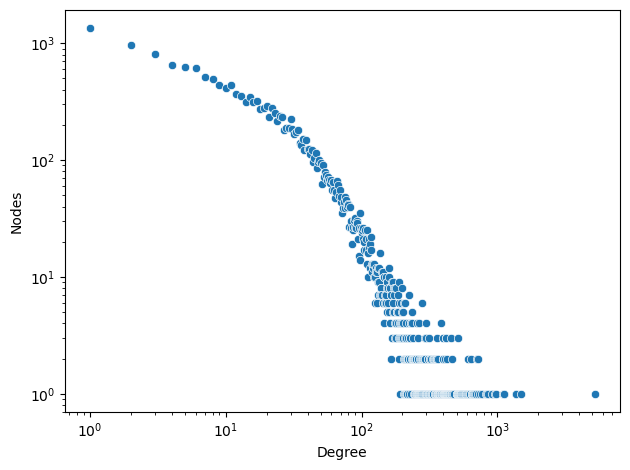

In [10]:
sns.scatterplot(data=dd,
                x='degree',
                y='number_nodes')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('Degree')
plt.ylabel('Nodes')

plt.tight_layout()
plt.show()

In [11]:
degrees_df.sort_values(by='degree')

,nodes,degree
18506,DNAH12,1
17140,MIR1302-9,1
17141,TSBP1,1
17144,NEAT1,1
17149,HPSE2,1
...,...,...
364,EP300,1126
145,CTCF,1363
914,GATA2,1371
241,ETS1,1498


# 2. Studying disease - gene associations

In [12]:
dga = pd.read_csv("data/disease_gene.tsv", sep='\t')

In [13]:
dga

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human


In [14]:
cleaned_dga = dga[dga.diseaseType == 'disease'][['geneSymbol', 
                                                 'diseaseName']].drop_duplicates()

In [15]:
cleaned_dga

,geneSymbol,diseaseName
1,A1BG,Schizophrenia
2,A2M,Alzheimer's Disease
3,A2M,Malignant tumor of colon
5,A2M,Presenile dementia
6,A2M,Mental Depression
...,...,...
84033,HBB-LCR,Cooley's anemia
84034,HBB-LCR,beta Thalassemia
84035,HBB-LCR,Hemoglobin F Disease
84036,HBB-LCR,Thalassemia Minor


In [16]:
num_genes = (cleaned_dga.groupby('diseaseName')
             .agg('count')
             .sort_values(by='geneSymbol')
             .reset_index()
             .rename(columns={'geneSymbol':'count_genes'}))

In [17]:
num_genes

,diseaseName,count_genes
0,11-Beta-hydroxylase deficiency,1
1,"MENTAL RETARDATION, X-LINKED 41",1
2,"MENTAL RETARDATION, X-LINKED 35",1
3,"MENTAL RETARDATION, X-LINKED 34 (disorder)",1
4,"MENTAL RETARDATION, X-LINKED 31",1
...,...,...
9342,Malignant neoplasm of prostate,616
9343,Colorectal Carcinoma,702
9344,"Liver Cirrhosis, Experimental",774
9345,Schizophrenia,883


In [18]:
distrib = (num_genes.groupby('count_genes')
           .agg('count')
           .reset_index()
           .rename(columns={'diseaseName':'count_diseases'}))

In [19]:
distrib

,count_genes,count_diseases
0,1,5726
1,2,1059
2,3,501
3,4,341
4,5,257
...,...,...
138,616,1
139,702,1
140,774,1
141,883,1


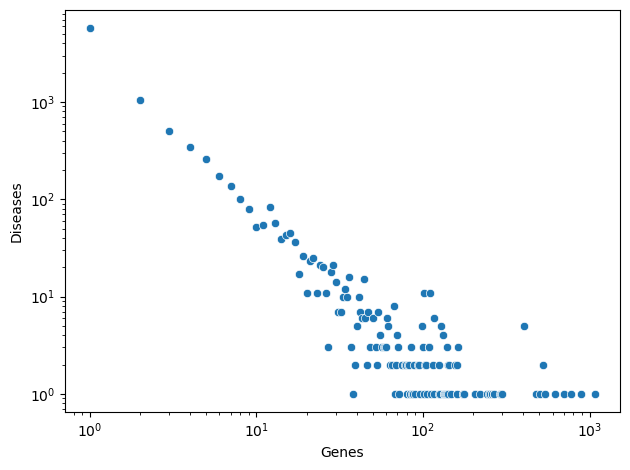

In [20]:
sns.scatterplot(data=distrib,
               x='count_genes',
               y='count_diseases')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('Genes')
plt.ylabel('Diseases')

plt.tight_layout()
plt.show()

In [21]:
filtered_dga = cleaned_dga.merge(num_genes, 
                                 on='diseaseName', 
                                 how='inner')
filtered_dga = filtered_dga[filtered_dga.count_genes>10]

In [22]:
filtered_dga

,geneSymbol,diseaseName,count_genes
0,A1BG,Schizophrenia,883
1,ABCA1,Schizophrenia,883
2,ACHE,Schizophrenia,883
3,ACP1,Schizophrenia,883
4,ACTB,Schizophrenia,883
...,...,...,...
60395,MIR511,Argentaffinoma,22
60396,MIR432,Argentaffinoma,22
60397,MIR494,Argentaffinoma,22
60398,MIR487B,Argentaffinoma,22


In [23]:
filtered_dga.diseaseName.nunique()

920

## EXERCISE

1. What are the top 10 genes mostly involved with diseases? What are those diseases?

2. What are the top 10 highly polygenic diseases?

3. What are the top 10 highly polygenic disease classes?

# 3. Studying drug - protein associations

In [24]:
dt = pd.read_csv('data/drug_target.csv')

In [25]:
dt

,i,ID,Name,Description,Started_commer,Ended_commer,ATC,State,Approved,Indication,Gene_Target,DB_id,name,organism,Type,known_action
0,1,DB00001,Lepirudin,Lepirudin is identical to natural hirudin exce...,1997-03-13,2012-07-27,B01AE,liquid,approved,For the treatment of heparin-induced thrombocy...,F2,BE0000048,Prothrombin,Humans,Polypeptide,yes
1,2,DB00002,Cetuximab,Cetuximab is an epidermal growth factor recept...,2004-06-29,NaN,L01XC,liquid,approved,"Cetuximab, used in combination with irinotecan...",EGFR,BE0002098,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,unknown
2,2,DB00002,Cetuximab,Cetuximab is an epidermal growth factor recept...,2004-06-29,NaN,L01XC,liquid,approved,"Cetuximab, used in combination with irinotecan...",FCGR3B,BE0002098,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,unknown
3,2,DB00002,Cetuximab,Cetuximab is an epidermal growth factor recept...,2004-06-29,NaN,L01XC,liquid,approved,"Cetuximab, used in combination with irinotecan...",C1QA,BE0002098,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,unknown
4,2,DB00002,Cetuximab,Cetuximab is an epidermal growth factor recept...,2004-06-29,NaN,L01XC,liquid,approved,"Cetuximab, used in combination with irinotecan...",C1QB,BE0002098,Low affinity immunoglobulin gamma Fc region re...,Humans,Polypeptide,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26812,13575,DB15688,Vazegepant,Vazegepant is an antagonist of the calcitonin ...,NaN,NaN,NaN,NaN,investigational,NaN,CALCRL,BE0009009,Calcitonin gene-related peptide type 1 receptor,Humans,Polypeptide,yes
26813,13577,DB15690,Fluoroestradiol F-18,Fluoroestradiol F-18 is an imaging agent used ...,2020-05-20,NaN,NaN,solid,approved,Fluoroestradiol F-18 is a radioactive diagnost...,ESR1,BE0000792,Estrogen receptor beta,Humans,Polypeptide,unknown
26814,13577,DB15690,Fluoroestradiol F-18,Fluoroestradiol F-18 is an imaging agent used ...,2020-05-20,NaN,NaN,solid,approved,Fluoroestradiol F-18 is a radioactive diagnost...,ESR2,BE0000792,Estrogen receptor beta,Humans,Polypeptide,unknown
26815,13577,DB15690,Fluoroestradiol F-18,Fluoroestradiol F-18 is an imaging agent used ...,2020-05-20,NaN,NaN,solid,approved,Fluoroestradiol F-18 is a radioactive diagnost...,SHBG,BE0000685,Sex hormone-binding globulin,Humans,Carrier,unknown


In [26]:
cleaned_dt = dt[dt.organism=='Humans'][['Gene_Target', 
                                        'Name']].drop_duplicates()

In [27]:
cleaned_dt.shape

(22751, 2)

In [28]:
dt.shape

(26817, 16)

In [29]:
cleaned_dt.head()

,Gene_Target,Name
0,F2,Lepirudin
1,EGFR,Cetuximab
2,FCGR3B,Cetuximab
3,C1QA,Cetuximab
4,C1QB,Cetuximab


In [30]:
target_dist = (cleaned_dt[['Gene_Target','Name']]
               .groupby('Gene_Target')
               .agg('count')
               .reset_index()
               .rename(columns={'Name':'count_drugs'}))

drug_dist = (cleaned_dt[['Gene_Target','Name']]
               .groupby('Name')
               .agg('count')
               .reset_index()
               .rename(columns={'Gene_Target':'count_targets'}))

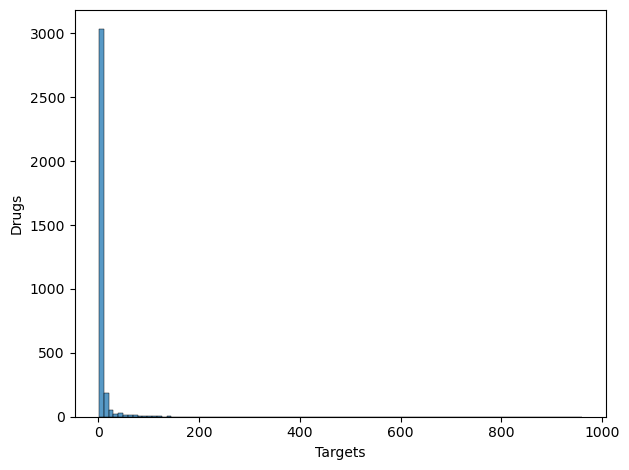

In [31]:
sns.histplot(data=target_dist,
             x='count_drugs', bins=100)

plt.xlabel('Targets')
plt.ylabel('Drugs')

plt.tight_layout()
plt.show()

Which Target is the most targetted gene?

In [32]:
target_dist.sort_values(by='count_drugs')

,Gene_Target,count_drugs
0,1,1
1933,PAK6,1
1932,PAK5,1
1931,PAK4,1
1930,PAK3,1
...,...,...
709,CYP2C9,358
710,CYP2D6,380
148,ALB,400
16,ABCB1,506


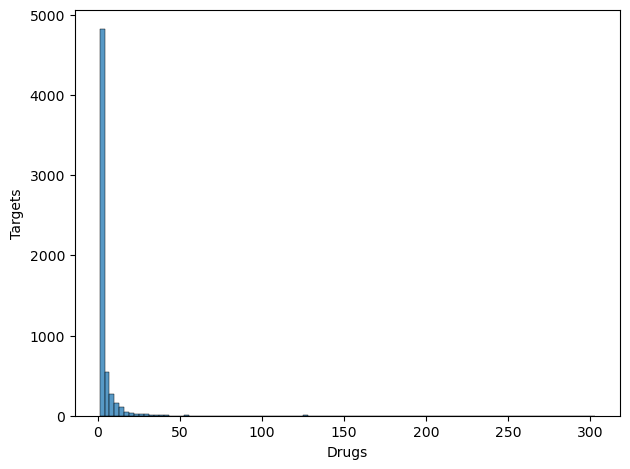

In [33]:
sns.histplot(data=drug_dist,
             x='count_targets', bins=100)

plt.xlabel('Drugs')
plt.ylabel('Targets')

plt.tight_layout()
plt.show()

## EXCERCISE

1. What are the top 10 genes mostly targeted by drugs? Are they types are they mostly?

2. What are the top 10 most promiscuous drugs? What are their indication?